In [1]:
import pandas as pd
import numpy as np
import math
import pylab
from pylab import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import os

In [8]:
save_folder = './Supplimentary_Sup/'
dataset = 'Immune_Human'

In [9]:
excel_path = '~/Downloads/All_metrics_15_Sep.xlsx' 
sheet_name =  'all_metrics_revision'

In [10]:
columns_to_scale = ["NMI cluster/label","ARI cluster/label","ASW label","ASW label/batch","PCR batch","isolated f1 score","isolated silhouette coefficient","graph connectivity","kBET","iLISI","cLISI"]
method_color_dct = {'scVI' : '#28DDED', 'Harmony': '#ED7A28','Seurat' : '#994363', 
       'BBKNN': '#B626D3', 'Scanorama': '#EDBF28', 
       'INSCT' : '#286CED', 'LIGER' : '#90EE90','fastMNN':  "#FFB6C1", "iMAP" : "#964B00",
       'scDREAMER': '#086E28', 'scANVI': '#c5b0d5',
'scGEN': '#d62829',
'scDREAMER-Sup': '#113f0a'
#                     "scANVI" : '#B626D3',
#         'scGEN': "#964B00",
#        'scDREAMER-Sup' : "#013220"
       }
methods_to_plot = ['scGEN','scANVI','scDREAMER-Sup']

# composite score supervised

In [11]:
import seaborn as sns
def plot_bar_multi(df,col,method_color_dct,save_folder=None):
    ax = sns.barplot(x='Percentage_wrong', y=col, hue='Method', data=df,palette=method_color_dct)#, ax=ax1)
    plt.xticks(rotation=90)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'family':"Arial",'weight':'bold','size':14})
    ax.get_legend().remove()
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(14)
        tick.label1.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(14)
        tick.label1.set_fontweight('bold')
    ax.set_ylabel(col,fontsize = 15, fontname='Arial', fontweight = 'bold')
    ax.set_xlabel('Percentage of missing cell type labels',fontsize = 15, fontname='Arial', fontweight = 'bold')
    rects = ax.patches
    for rect in rects:
        height = rect.get_height()
        ax.text(
        rect.get_x() + rect.get_width() / 2, height, round(height,2), ha="center", va="bottom"
            )
    ax. spines['top']. set_visible(False)
    ax. spines['right']. set_visible(False)
    if save_folder:
        if not os.path.exists(save_folder):
            print(save_folder)
            os.makedirs(save_folder)
        plt.savefig(save_folder+'/'+col.replace('/','_')+'.png', transparent=True, bbox_inches='tight')
    plt.show()
    
from sklearn.preprocessing import MinMaxScaler
def scale_with_mini(df,min_values):
    for col in df.columns:
        scaler = MinMaxScaler(feature_range=(min_values[col],1))
        df.loc[:,col] = scaler.fit_transform(np.array(df.loc[:,col]).reshape(-1,1))
    return df
def scale(df):
    scaler = MinMaxScaler()
    df = scaler.fit_transform(df)
    return df

# scale all min max

In [12]:
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset.loc[:,columns_to_scale] =scale(df_dataset.loc[:,columns_to_scale])
df_dataset = df_dataset.loc[methods_to_plot,:]
df_dataset

,NMI cluster/label,ARI cluster/label,ASW label,ASW label/batch,PCR batch,isolated f1 score,isolated silhouette coefficient,graph connectivity,kBET,iLISI,cLISI,Percentage_wrong,trajectory,NMI k-means,comments,Unnamed: 17
Method,,,,,,,,,,,,,,,,
scGEN,0.763474,0.874918,1.000000,0.810524,0.485431,0.811766,0.789329,0.984954,0.669853,0.341572,1.000000,0.0,0.902970,NaN,NaN,NaN
scGEN,0.541917,0.757518,0.879567,0.903425,0.559084,0.716877,0.738768,0.863483,0.611810,0.312776,1.000000,10.0,NaN,NaN,NaN,NaN
scGEN,0.425532,0.609779,0.778878,0.854289,0.625355,0.646000,0.677696,0.541667,0.514330,0.249591,1.000000,20.0,NaN,NaN,NaN,NaN
scGEN,0.179828,0.281052,0.490195,0.768327,0.795300,0.356241,0.445233,0.250405,0.386398,0.002893,0.996179,50.0,NaN,NaN,NaN,NaN
scANVI,0.682769,0.860860,0.585716,0.655303,0.771195,0.821360,0.969176,0.955117,0.060343,0.239962,0.995308,0.0,0.883545,NaN,NaN,NaN
scANVI,0.666841,0.848737,0.582534,0.648119,0.791613,0.806937,0.942409,0.897896,0.079220,0.280902,0.994071,10.0,NaN,NaN,NaN,NaN
scANVI,0.628636,0.801534,0.588860,0.649700,0.792720,0.808213,0.940436,0.954631,0.094263,0.296518,0.994478,20.0,NaN,NaN,NaN,NaN
scANVI,0.611791,0.782522,0.567743,0.658054,0.799796,0.723843,0.944646,0.953732,0.097794,0.295095,0.993642,50.0,NaN,NaN,NaN,NaN
scDREAMER-Sup,0.997796,0.998657,0.779966,0.860618,0.671189,1.000000,0.592379,0.998991,1.000000,0.456305,1.000000,0.0,NaN,NaN,NaN,NaN


# scale with mini

In [13]:
# df = pd.read_excel(excel_path,sheet_name =sheet_name)
# df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
# df_dataset.index = df_dataset['Method']
# df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
# mini_values = df_dataset.loc[:,columns_to_scale].min(axis = 0)
# df_dataset = df_dataset.loc[methods_to_plot,:]
# df_dataset.loc[:,columns_to_scale] =scale_with_mini(df_dataset.loc[:,columns_to_scale],mini_values)
# df_dataset

# scale normal or existing

In [14]:
# df = pd.read_excel(excel_path,sheet_name =sheet_name)
# df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
# df_dataset.index = df_dataset['Method']
# df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
# df_dataset = df_dataset.loc[methods_to_plot,:]
# df_dataset.loc[:,columns_to_scale] =scale(df_dataset.loc[:,columns_to_scale])
# df_dataset

# calculate composite

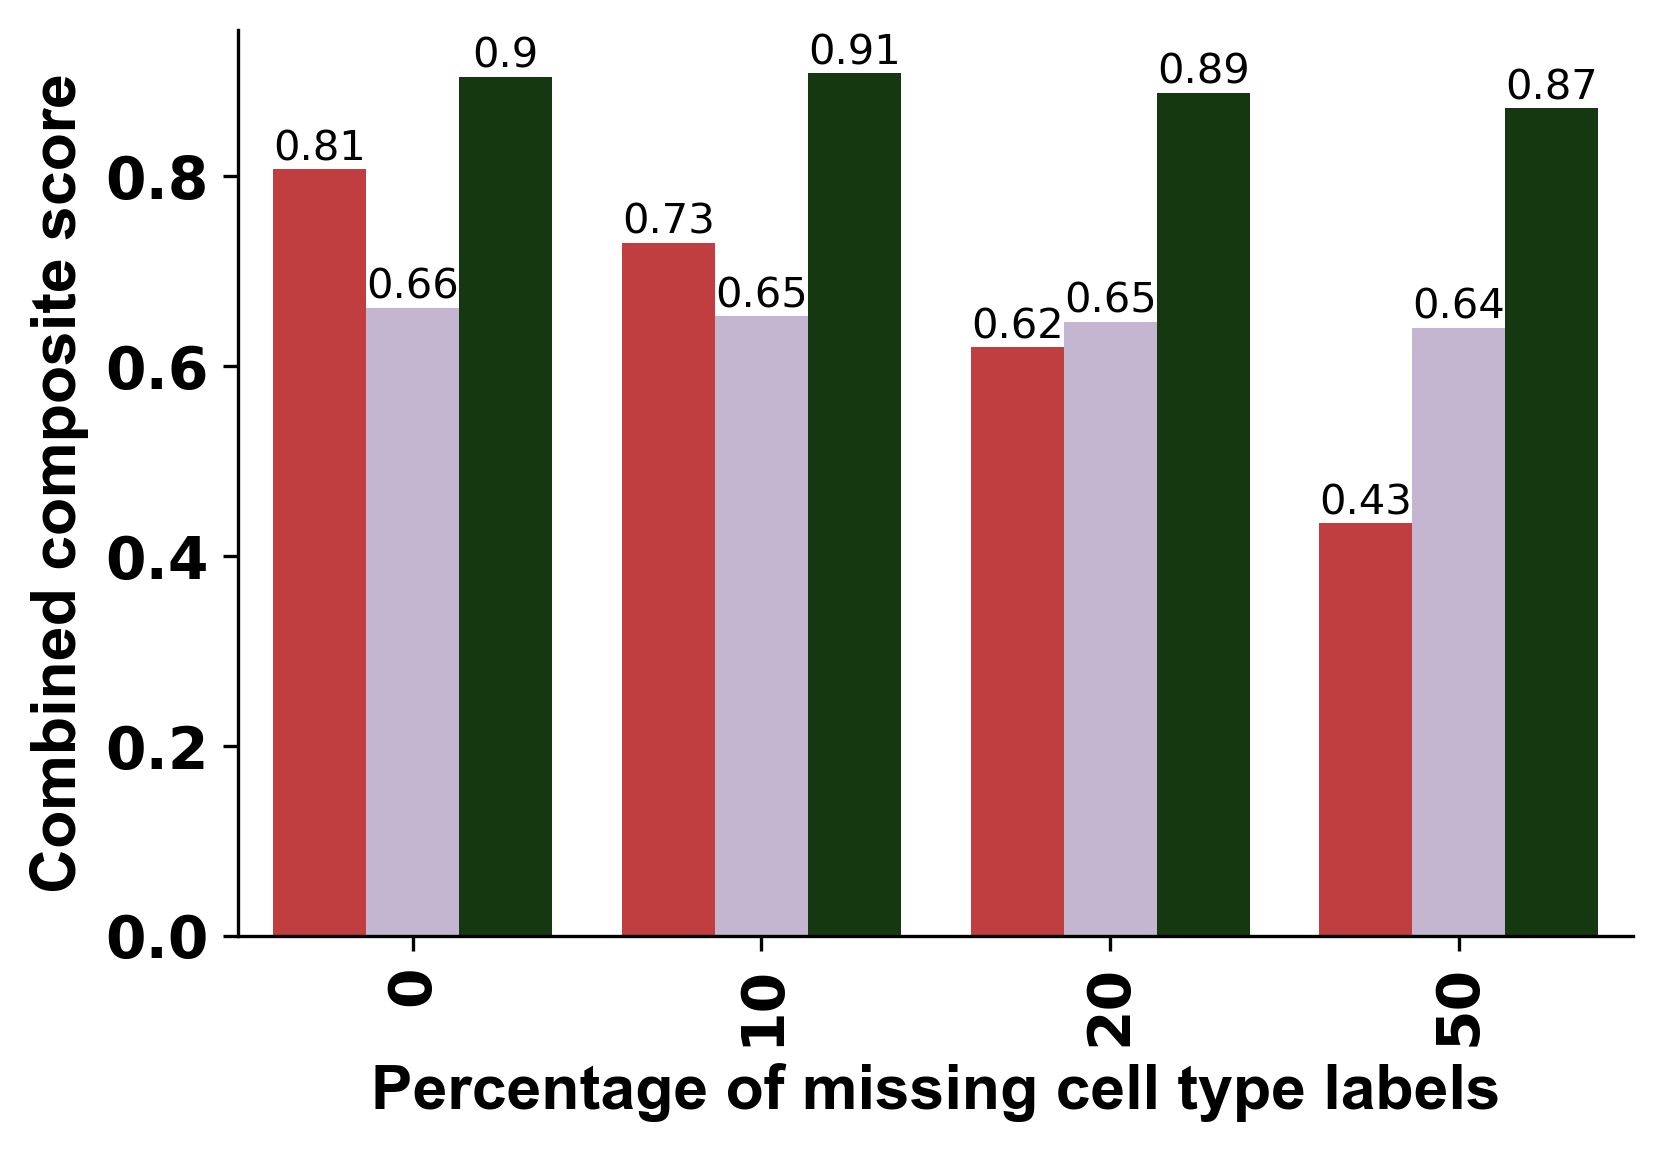

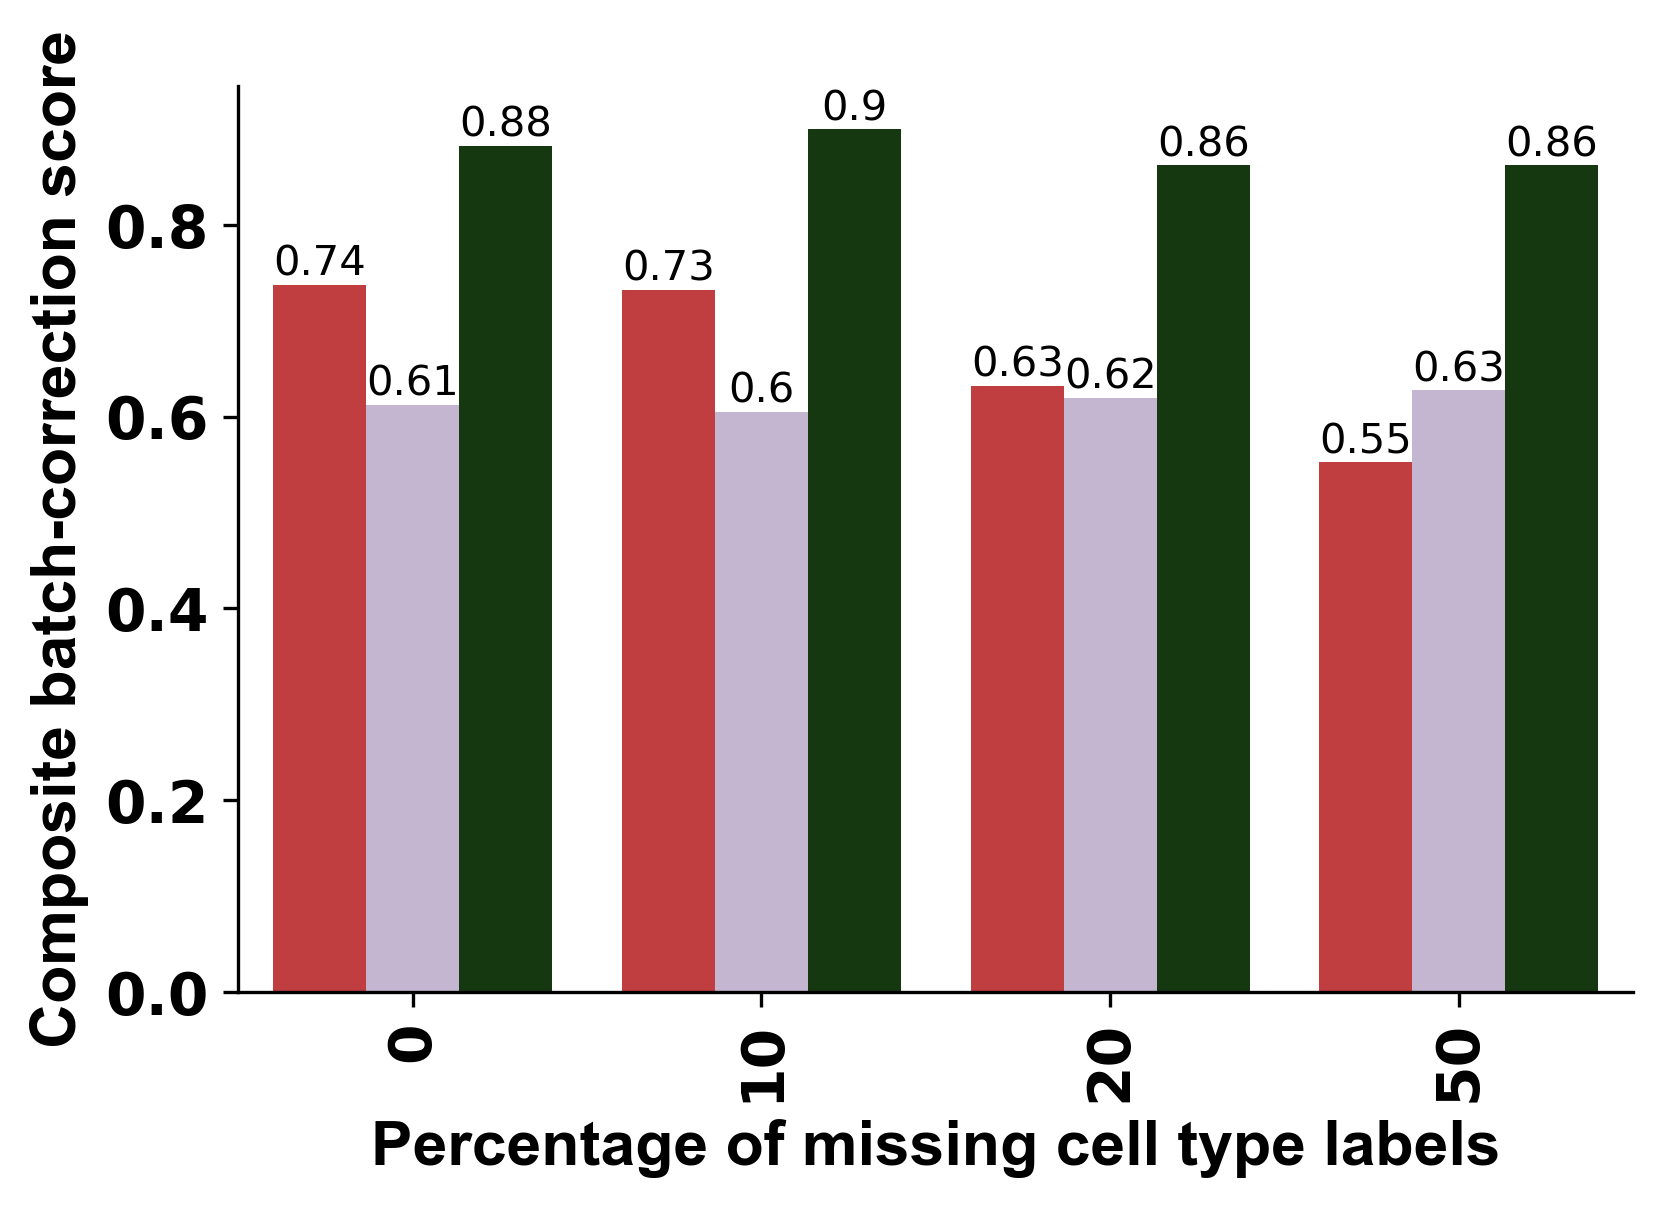

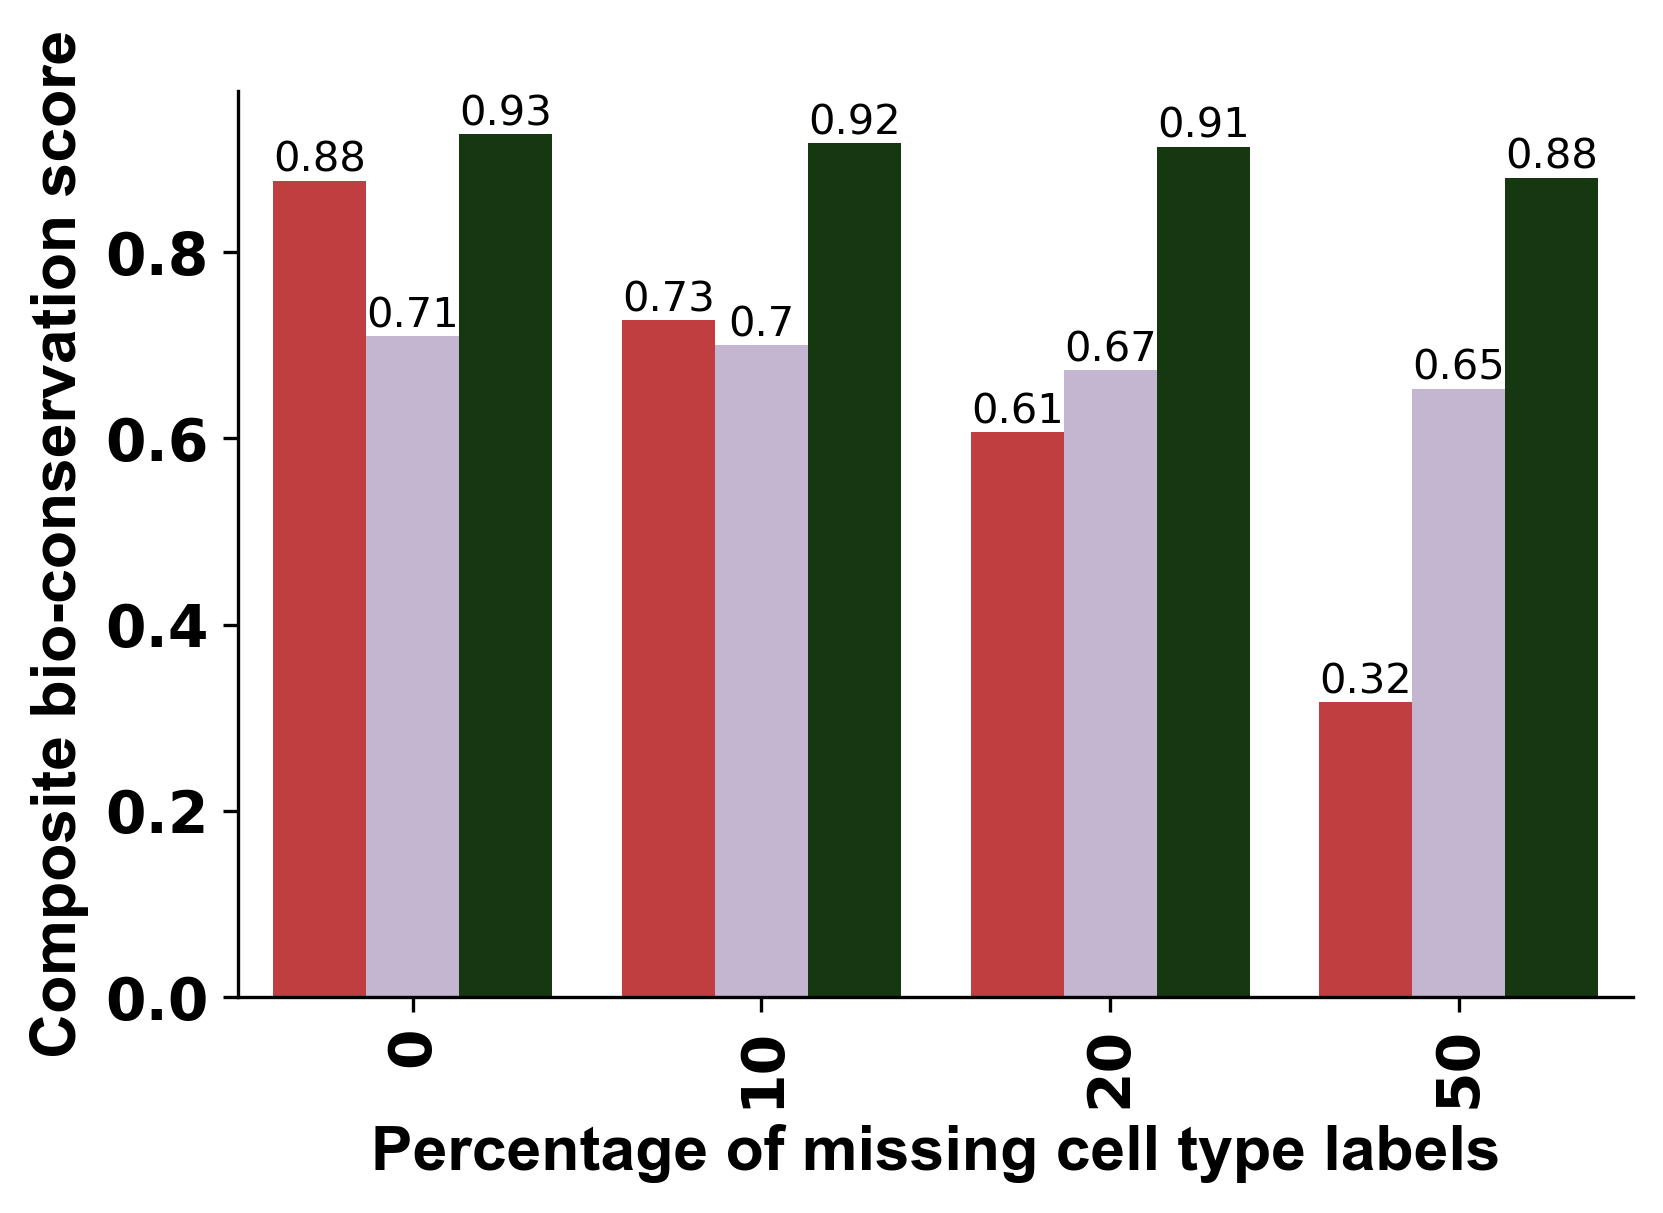

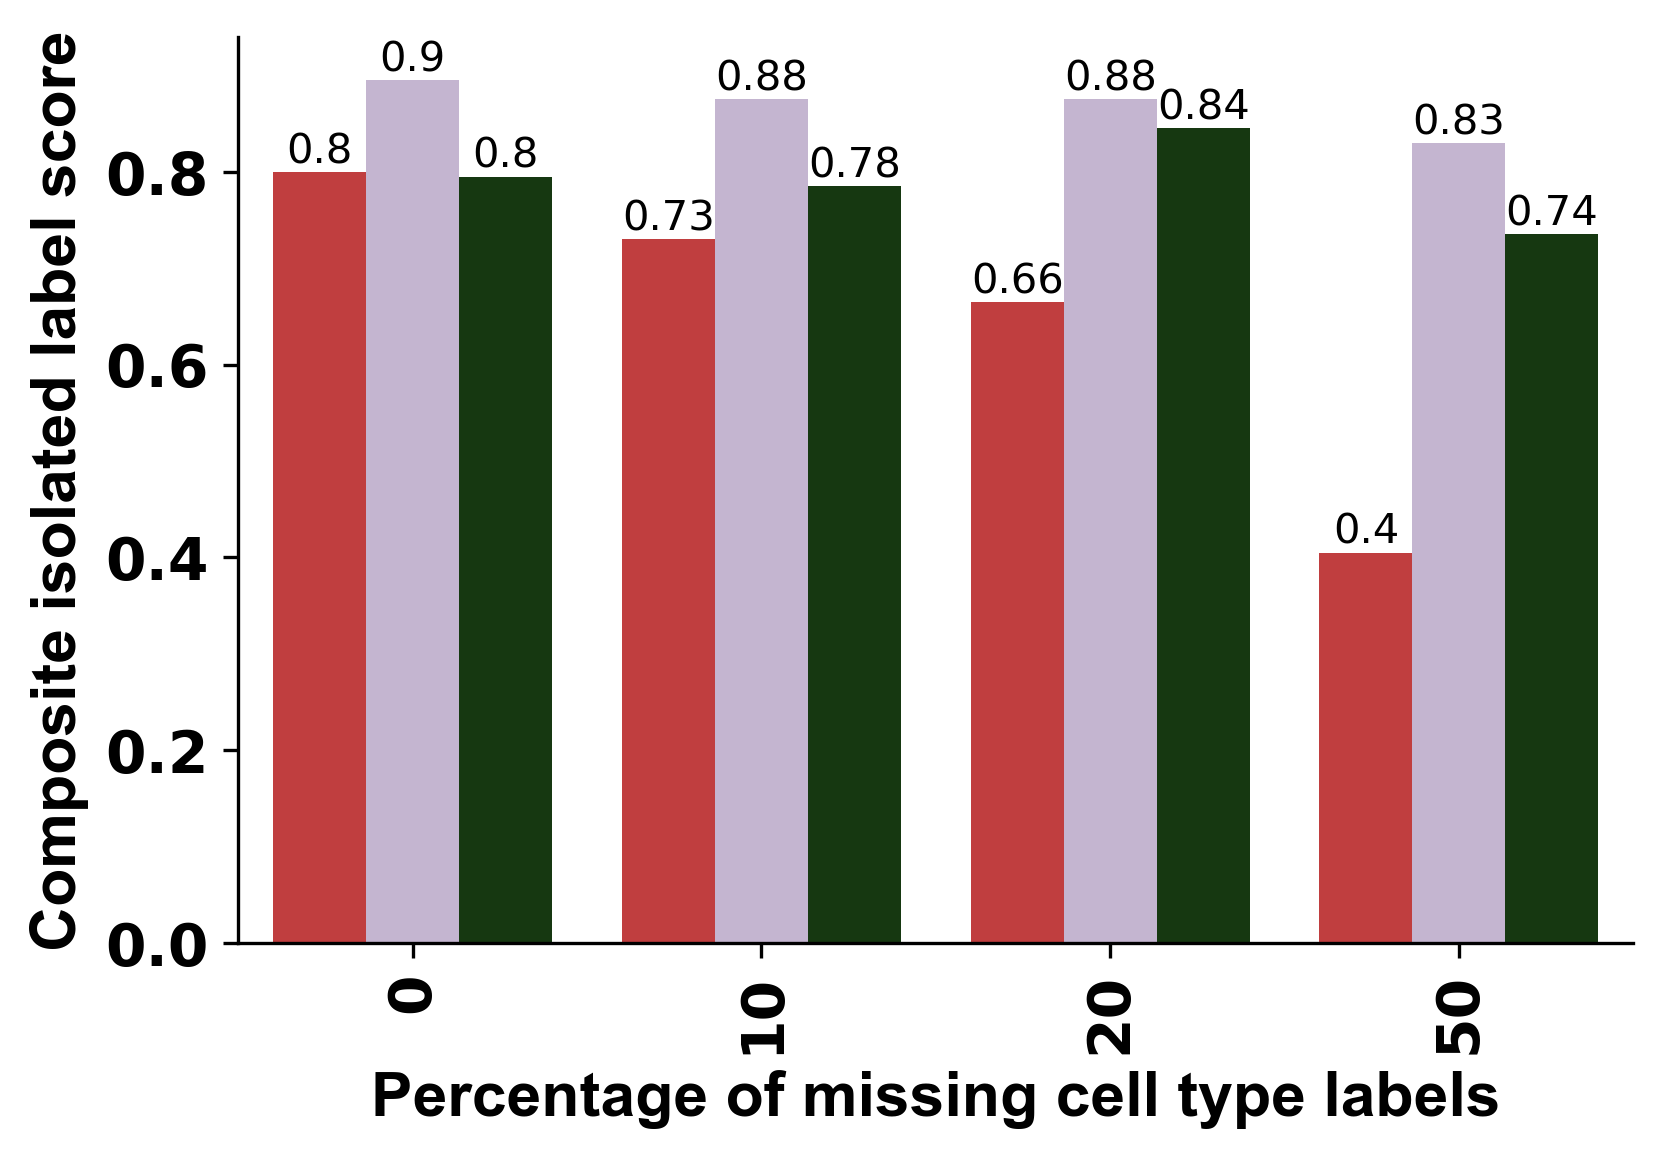

In [15]:
if dataset in ['Immune_Human','Lung']:
    df_dataset['Percentage_wrong'] = df_dataset['Percentage_wrong'].astype('int32')
    df_dataset = df_dataset.apply(lambda x:x.apply(lambda y:round(y,2) if type(y)==type(0.0) else y))
    df_dataset['color'] = pd.Series(df_dataset.index,index=df_dataset.index).replace(method_color_dct)
    df_dataset['Method'] = df_dataset.index
    df_dataset['Composite bio-conservation score'] = df_dataset[['NMI cluster/label', 'ARI cluster/label', 'ASW label']].mean(axis = 1)
    df_dataset['Composite batch-correction score'] = df_dataset[['ASW label/batch', 'PCR batch', 'graph connectivity', 'kBET']].mean(axis = 1)
    df_dataset['Composite isolated label score'] = df_dataset[['isolated silhouette coefficient', 'isolated f1 score']].mean(axis = 1)
    df_dataset['Combined composite score'] = df_dataset[['Composite bio-conservation score', 'Composite batch-correction score']].mean(axis = 1)
    plot_bar_multi(df_dataset, 'Combined composite score',method_color_dct,save_folder =save_folder+dataset)
    plot_bar_multi(df_dataset, 'Composite batch-correction score',method_color_dct,save_folder =save_folder+dataset)
    plot_bar_multi(df_dataset, 'Composite bio-conservation score',method_color_dct,save_folder =save_folder+dataset)
    plot_bar_multi(df_dataset, 'Composite isolated label score',method_color_dct,save_folder =save_folder+dataset)

In [14]:
# scVI - cyan
# Harmony - orange
# Seurat - magenta
# BBKNN - purple
# Scanorama - yellow
# INSCT - blue
# iMAP - brown
# Liger - light green
# fastMNN - light pink
# scANVI - removed from main figure
# scDREAMER - Green
# scDREAMER++ - Red

# legend

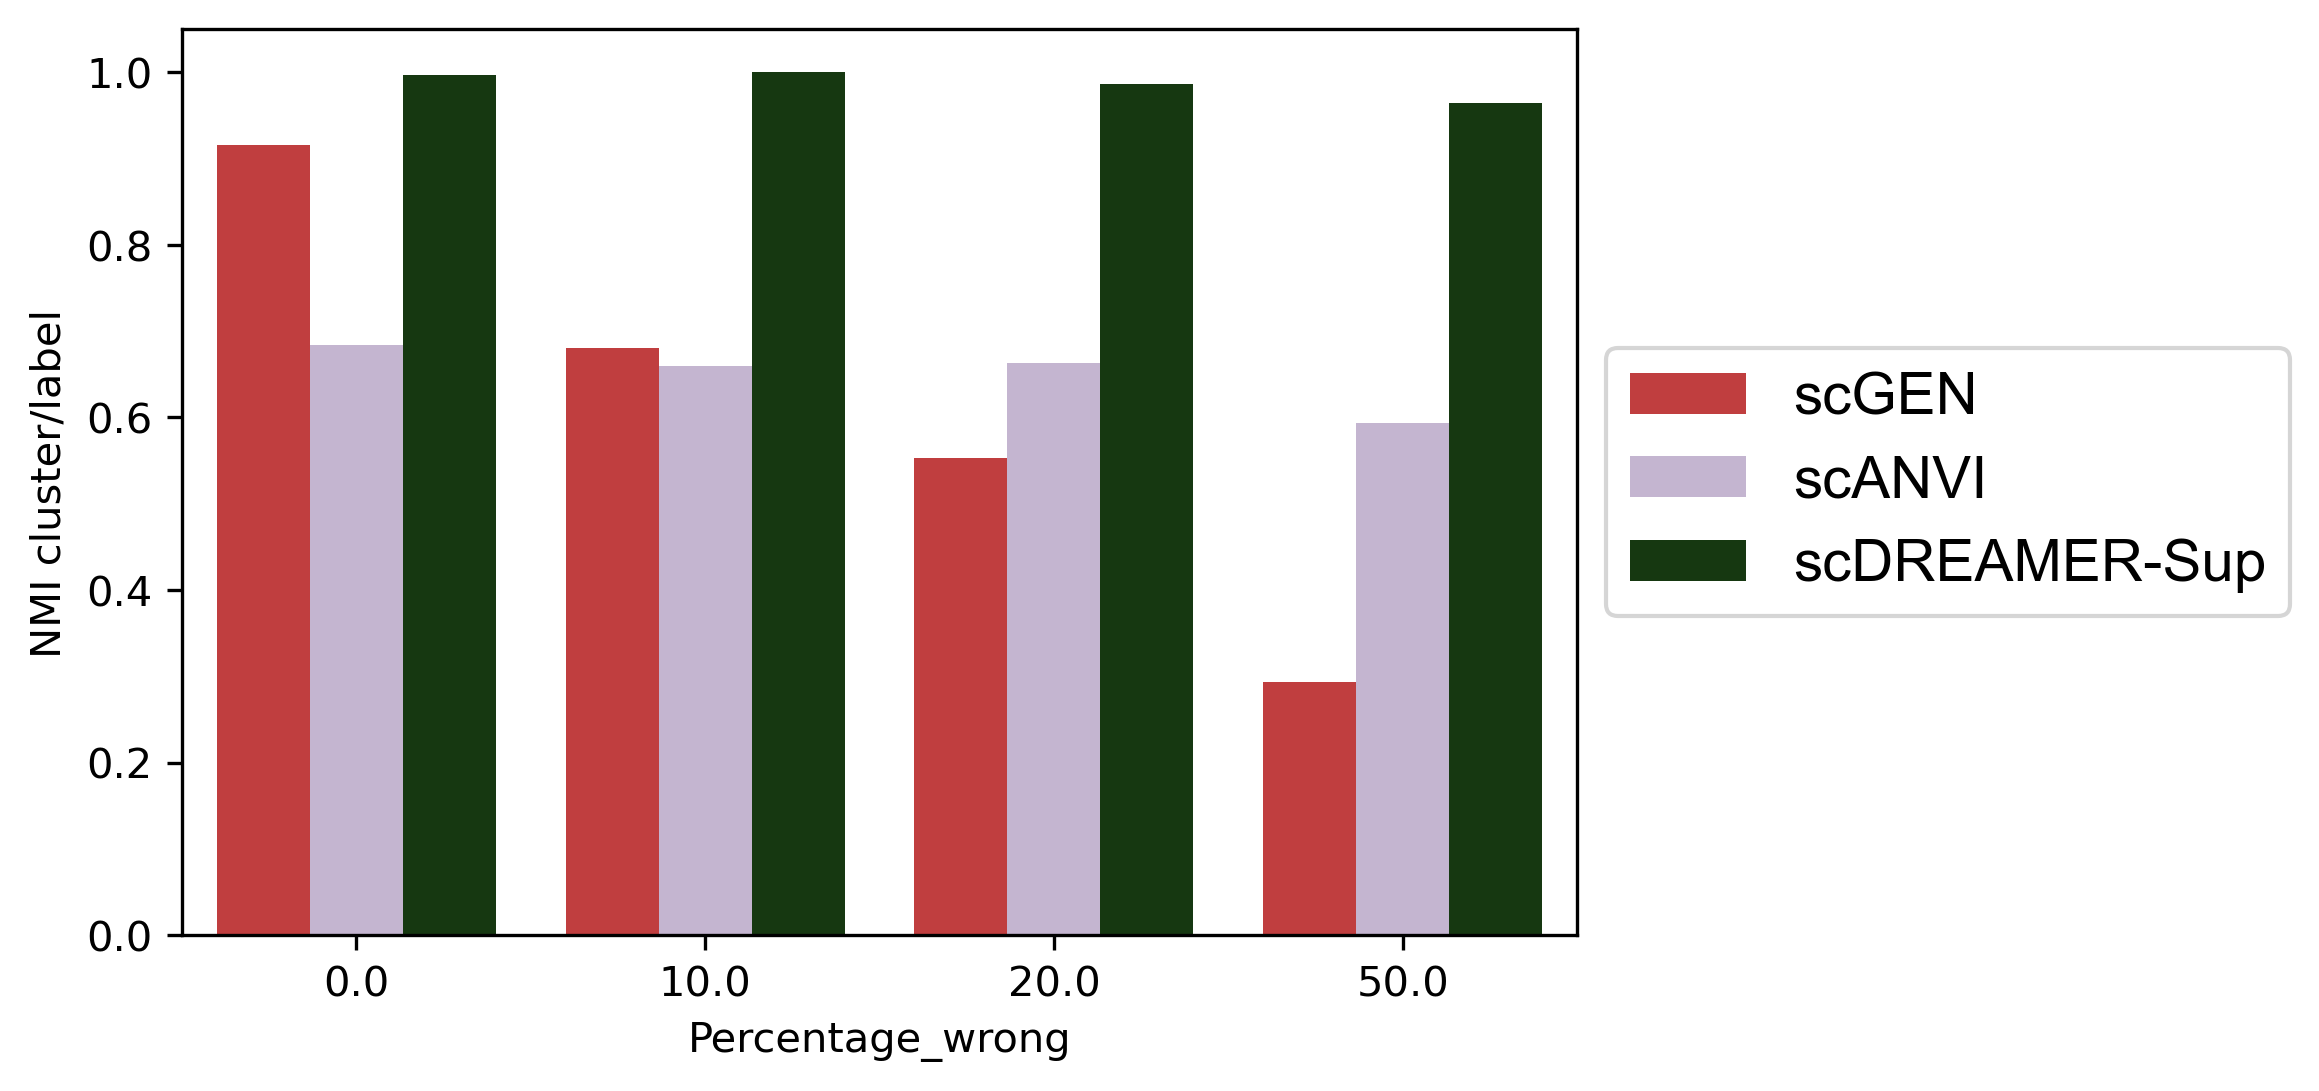

In [17]:
df_dataset['Method'] = df_dataset.index
ax = sns.barplot(x='Percentage_wrong', y='NMI cluster/label', hue='Method', data=df_dataset,palette=method_color_dct)#, ax=ax1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'family':"Arial",'size':14})
plt.savefig('./Supplimentary_Sup/Sup_legend.png', transparent=True, bbox_inches='tight')

In [8]:
if dataset in ['Immune_Human','Lung']:
    df_dataset['Percentage_wrong'] = df_dataset['Percentage_wrong'].astype('int32')
    df_dataset = df_dataset.apply(lambda x:x.apply(lambda y:round(y,2) if type(y)==type(0.0) else y))
    df_dataset['color'] = pd.Series(df_dataset.index,index=df_dataset.index).replace(method_color_dct)
    df_dataset['Method'] = df_dataset.index
    df_dataset['Composite bio-conservation score'] = df_dataset[['NMI cluster/label', 'ARI cluster/label', 'ASW label']].mean(axis = 1)
    df_dataset['Composite batch-correction score'] = df_dataset[['ASW label/batch', 'PCR batch', 'graph connectivity', 'kBET']].mean(axis = 1)
    df_dataset['Composite isolated label score'] = df_dataset[['isolated silhouette coefficient', 'isolated f1 score']].mean(axis = 1)
    df_dataset['Combined composite score'] = df_dataset[['Composite bio-conservation score', 'Composite batch-correction score']].mean(axis = 1)
    df_dataset = df_dataset[['Composite bio-conservation score','Composite batch-correction score','Composite isolated label score','Combined composite score','Percentage_wrong']]
    

In [9]:
df_dataset.to_csv(dataset+'_supervised_composite_scores.csv',sep='\t',index=True)